In [24]:
import re
import unicodedata
import pandas as pd
import nltk
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import acquire
import prepare
import nltk.sentiment

### Load the spam data set.

In [25]:
df = pd.read_csv('spam_clean.csv')
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [27]:
df.label.value_counts(normalize = True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [28]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


In [29]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [30]:
df[df.label == 'ham'].text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 4825, dtype: object

In [35]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))

In [39]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(ham_words).value_counts()

In [40]:
spam_bigrams = pd.Series(nltk.ngrams(spam_words, 2))
ham_bigrams = pd.Series(nltk.ngrams(ham_words, 2))

In [41]:
spam_bigrams.value_counts()

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
                       ..
(1000, gr8)             1
(stop, private)         1
(see, getting)          1
(0870, chatlines)       1
(premier, call)         1
Length: 6886, dtype: int64

In [42]:
ham_bigrams.value_counts()

(call, later)        52
(ill, call)          48
(let, know)          42
(sorry, ill)         39
(dont, know)         32
                     ..
(go, kill)            1
(get, seperatedo)     1
(1st, salary)         1
(going, e)            1
(e, second)           1
Length: 30869, dtype: int64

In [44]:
top20_spam_bigrams = spam_bigrams.value_counts().head(20)
top20_ham_bigrams = ham_bigrams.value_counts().head(20)

(-0.5, 799.5, 399.5, -0.5)

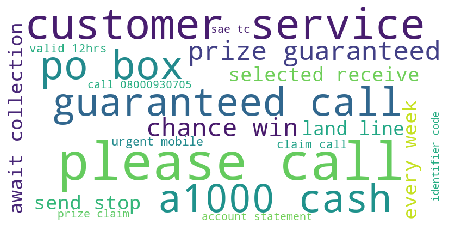

In [45]:
data = {k[0] + ' ' + k[1]: v for k, v in top20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

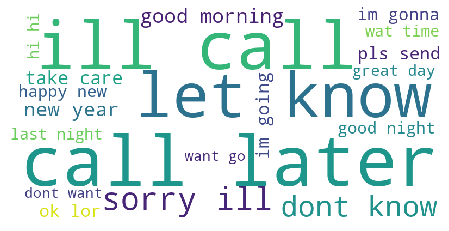

In [46]:
data = {k[0] + ' ' + k[1]: v for k, v in top20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

### Is there any overlap in the bigrams for the spam data and the ham data?

In [47]:
set(spam_bigrams) & set(ham_bigrams)

{('26th', 'july'),
 ('3', 'hour'),
 ('3', 'week'),
 ('4', '1'),
 ('4', 'free'),
 ('4', 'next'),
 ('4', 'ur'),
 ('anyone', 'going'),
 ('babe', 'im'),
 ('babe', 'make'),
 ('baby', 'im'),
 ('back', 'id'),
 ('back', 'work'),
 ('bill', '3'),
 ('brand', 'new'),
 ('call', '4'),
 ('call', 'back'),
 ('call', 'call'),
 ('call', 'cost'),
 ('call', 'free'),
 ('call', 'landline'),
 ('call', 'text'),
 ('called', 'left'),
 ('cant', 'get'),
 ('chat', 'dont'),
 ('come', 'take'),
 ('could', 'meet'),
 ('couple', 'day'),
 ('customer', 'service'),
 ('day', 'fri'),
 ('day', 'get'),
 ('day', 'give'),
 ('day', 'send'),
 ('day', 'today'),
 ('dont', 'forget'),
 ('dont', 'know'),
 ('dont', 'like'),
 ('dont', 'miss'),
 ('dont', 'tell'),
 ('enjoy', 'one'),
 ('every', 'week'),
 ('fall', 'love'),
 ('first', 'time'),
 ('free', 'call'),
 ('free', 'message'),
 ('free', 'next'),
 ('game', 'send'),
 ('get', '3'),
 ('get', 'free'),
 ('get', 'phone'),
 ('get', 'ur'),
 ('girl', 'waiting'),
 ('give', 'u'),
 ('go', 'another')

### Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [49]:
spam_trigrams = pd.Series(nltk.ngrams(spam_words, 3))
ham_trigrams = pd.Series(nltk.ngrams(ham_words, 3))

In [51]:
top_20_spam_trigrams = spam_trigrams.value_counts().head(10)
top_20_spam_trigrams

(prize, guaranteed, call)     21
(call, customer, service)     15
(reply, call, 08000930705)    14
(land, line, claim)           14
(private, 2003, account)      13
(2003, account, statement)    13
(show, 800, unredeemed)       12
(camcorder, reply, call)      12
(guaranteed, a1000, cash)     12
(tone, 4, ur)                 11
dtype: int64

In [52]:
top_20_ham_trigrams = ham_trigrams.value_counts().head(10)
top_20_ham_trigrams

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(cant, pick, phone)     12
(right, pls, send)      12
(pick, phone, right)    12
(phone, right, pls)     12
(hi, hi, hi)            11
(x, x, x)                8
dtype: int64